# El problema ONE MAX

El problema OneMax (o One-Max) es una tarea de optimización sencilla que se utiliza a menudo como el "Hola Mundo" de los marcos de algoritmos genéticos. 

Utilizaremos este problema para demostrar cómo se puede usar DEAP para implementar un algoritmo genético. La tarea OneMax consiste en encontrar la cadena binaria de una longitud dada que maximice la suma de sus dígitos.

 Por ejemplo, el problema OneMax de longitud 5 considerará candidatos como los siguientes.
 - 10010 -> la suma es 3
 - 11111 -> la suma es 5
 - 0101  -> la suma es 2

 Como podemos observar la cadena que maximiza la suma de los digitos es numero binario 11111

## Pasos para construir el Algoritmo Genetico

A menudo la siguiente cadena de pasos se utiliza para construir un algoritmo genético:

#### Paso 1. Elección del cromosoma

Dado que el problema OneMax se basa en cadenas binarias, la elección del cromosoma es sencilla: cada individuo se representará con una cadena binaria que representa directamente una solución candidata.

En la implementación real de Python, esto se implementará como una lista con valores enteros de 0 o 1.

La longitud del cromosoma coincide con el tamaño del problema OneMax. Por ejemplo, para un problema OneMax de tamaño 5, los 10010 individuos se representarán mediante la lista [1, 0, 0, 1, 0].

### Paso 2. Calculando la función de aptitud o fitness

Como queremos encontrar al individuo con la mayor suma de dígitos, usaremos la estrategia FitnessMax.

Como cada individuo está representado por una lista de valores enteros de 0 o 1, el valor de aptitud se calculará directamente como la suma de los elementos de la lista, por ejemplo: suma([1, 0, 0, 1, 0]) = 2.

### Paso 3. Eligiendo el operador genético

Aquí se decidirá los operadores genéticos que utilizaremos: selección, cruce o mutación. Elegir los operadores genéticos no es una ciencia exacta, y normalmente podemos experimentar con varias opciones.

IMPORTANTE!!!

Sin embargo, si bien los operadores de selección suelen funcionar con cualquier tipo de cromosoma, los operadores de cruce y mutación que elijamos deben coincidir con el tipo de cromosoma que utilizamos; de lo contrario, podrían producir cromosomas inválidos. 

Para el operador de selección, podemos empezar con la selección de torneo, ya que es simple y eficiente. Posteriormente, podemos experimentar con otras estrategias de selección, como la selección de ruleta y SUS.

Para el operador de cruce, serán adecuados los operadores de cruce de un solo punto o de dos puntos, ya que el resultado de cruzar dos cadenas binarias mediante estos métodos producirá una cadena binaria válida.

El operador de mutación puede ser la simple mutación de bit invertido, que funciona bien con cadenas binarias.

### Paso 4. Ajustando la condición de parada.

Siempre es recomendable limitar el número de generaciones para garantizar que el algoritmo no se ejecute indefinidamente.

Esto nos da una condición de parada. Además, como conocemos la mejor solución para el problema OneMax (una cadena binaria con solo unos y un valor de aptitud igual a la longitud del individuo), podemos usarla como segunda condición de parada.

# Implementación con DEAP

In [4]:
pip install matplotlib

  Using cached matplotlib-3.10.6-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.0-cp313-cp313-win_amd64.whl.metadata (113 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.4-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.6-cp313-cp313-win_amd64.whl (8.1 MB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   -----------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from deap import base
from deap import creator
from deap import tools
import random
import matplotlib.pyplot as plt

In [ ]:
 #Variables a tomar en cuenta

# problem constants:
ONE_MAX_LENGTH = 100    #longitud de la cadena binaria a optimizar

 # Genetic Algorithm constants:
POPULATION_SIZE = 200  #numero de individuos en la población

P_CROSSOVER = 0.9      # probabilidad de cruce  

P_MUTATION = 0.1        #probabiliadad de mutación de un individuo
                        
MAX_GENERATIONS = 50     # max number of generations for
                         # stopping condition

Un aspecto importante del algoritmo genético es el uso de la probabilidad, que introduce un elemento aleatorio en su comportamiento.

Sin embargo, al experimentar con el código, es posible que queramos ejecutar el mismo experimento varias veces y obtener resultados repetibles.

Para lograrlo, establecemos la semilla de la función aleatoria en un número constante de algún valor, como se muestra en el siguiente código:

In [5]:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

Como vimos la clase Toolbox es una de las principales utilidades del framework DEAP, que permite registrar nuevas funciones (u operadores) que personalizan funciones existentes mediante argumentos predefinidos.

Aquí la usamos para crear el operador zeroOrOne, que personaliza la función random.randomint(a, b). Esta función normalmente devuelve un entero aleatorio N tal que a ≤ N ≤ b. Al fijar los dos argumentos, a y b, a los valores 0 y 1, el operador zeroOrOne devolverá aleatoriamente el valor 0 o el valor 1 cuando se le llame posteriormente en el código. El siguiente fragmento de código define la variable toolbox y la utiliza para registrar el operador zeroOrOne:

In [8]:
toolbox = base.Toolbox() #crea una instancia de la clase Toolbox
toolbox.register("zeroOrOne", random.randint, 0, 1) #registra el operador zeroOrOne que devuelve 0 o 1

A continuación, necesitamos crear la clase Fitness. Dado que solo tenemos un objetivo (la suma de dígitos) y nuestra meta es maximizarla, elegimos la estrategia FitnessMax, usando una tupla de pesos con un solo peso positivo, como se muestra en el siguiente fragmento de código:

In [9]:
 creator.create("FitnessMax", base.Fitness, weights=(1.0,))

En DEAP, la convención es usar una clase llamada Individual para representar a cada individuo de la población. Esta clase se crea con la herramienta de creación. En nuestro caso, la clase base es list, que se utiliza como cromosoma del individuo. La clase se complementa con el atributo fitness, inicializado en la clase FitnessMax que definimos anteriormente:

In [10]:
creator.create("Individual", list, fitness=creator.FitnessMax)

A continuación, registramos el operador individualCreator, que crea una instancia de la clase Individual, que se llena con valores aleatorios de 0 o 1.

Esto se realiza personalizando el operador zeroOrOne previamente definido. Esta definición utiliza el operador initRepeat, mencionado anteriormente como clase base, y se personaliza aquí con los siguientes argumentos: La clase Individual como el tipo de contenedor donde se colocarán los objetos resultantes.

El operador zeroOrOne como la función utilizada para generar objetos. La constante ONE_MAX_LENGTH como el número de objetos que queremos generar (actualmente establecida en 100). Dado que los objetos generados por el operador zeroOrOne son enteros con valores aleatorios de 0 o 1, el operador individualCreator resultante llenará una instancia de Individual con 100 valores aleatorios de 0 o 1:

In [11]:
 toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)

Finalmente, registramos el operador populationCreator, que crea una lista de individuos. Esta definición también utiliza el operador initRepeat, con los siguientes argumentos: la clase de lista como tipo contenedor;el operador individualCreator, definido anteriormente, como la función utilizada para generar los objetos de la lista.

El último argumento de initRepeat (el número de objetos que queremos generar) no se proporciona aquí. Esto significa que, al usar el operador populationCreator, este argumento se esperará y se utilizará para determinar el número de individuos creados; es decir, el tamaño de la población.

In [12]:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

Para facilitar el cálculo de la aptitud (o evaluación, en la terminología de DEAP), comenzamos definiendo una función independiente que acepta una instancia de la clase Individual y devuelve su aptitud.

Aquí, definimos una función llamada oneMaxFitness que calcula el número de unos en el individuo. Dado que el individuo es esencialmente una lista con valores de 1 o 0, la función sum() de Python se puede usar directamente para este propósito:

In [13]:
def oneMaxFitness(individual):
 return sum(individual), # return a tuple

A continuación, definimos el operador de evaluación como un alias de la función oneMaxfitness() que definimos anteriormente. Como verá más adelante, usar el alias de evaluación para calcular la aptitud es una convención DEAP:


In [14]:
 toolbox.register("evaluate", oneMaxFitness)

In [16]:
pip install seaborn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -----------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\javie\AppData\Local\Programs\Python\Python313\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\javie\AppData\Local\Programs\Python\Python313\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


- Generation 1: Max Fitness = 65.0, Avg Fitness = 53.575
Best Individual =  1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 

- Generation 2: Max Fitness = 66.0, Avg Fitness = 56.855
Best Individual =  1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 

- Generation 3: Max Fitness = 69.0, Avg Fitness = 59.42
Best Individual =  1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 

- Generation 4: Max Fitness = 70.0, Avg Fitness = 62.03
Best Individual =  1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 

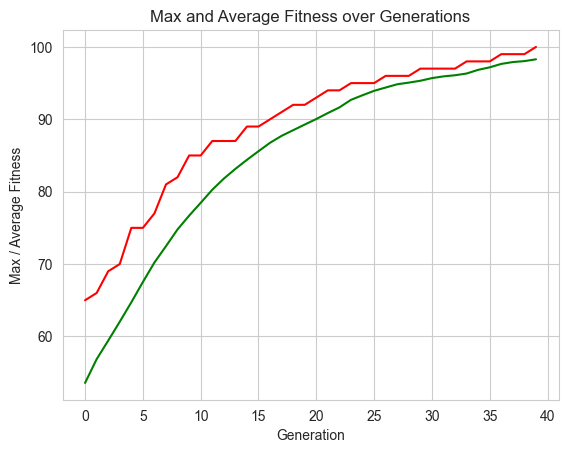

In [2]:
from deap import base
from deap import creator
from deap import tools

import random

import matplotlib.pyplot as plt
import seaborn as sns

# problem constants:
ONE_MAX_LENGTH = 100  # length of bit string to be optimized

# Genetic Algorithm constants:
POPULATION_SIZE = 200
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual
MAX_GENERATIONS = 50


# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

toolbox = base.Toolbox()

# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)
#creator.create("Individual", array.array, typecode='b', fitness=creator.FitnessMax)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation:
# compute the number of '1's in the individual
def oneMaxFitness(individual):
    return sum(individual),  # return a tuple


toolbox.register("evaluate", oneMaxFitness)

# genetic operators:

# Tournament selection with tournament size of 3:
toolbox.register("select", tools.selTournament, tournsize=3)

# Single-point crossover:
toolbox.register("mate", tools.cxOnePoint)

# Flip-bit mutation:
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)


# Genetic Algorithm flow:
def main():

    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)
    generationCounter = 0

    # calculate fitness tuple for each individual in the population:
    fitnessValues = list(map(toolbox.evaluate, population))
    for individual, fitnessValue in zip(population, fitnessValues):
        individual.fitness.values = fitnessValue

    # extract fitness values from all individuals in population:
    fitnessValues = [individual.fitness.values[0] for individual in population]

    # initialize statistics accumulators:
    maxFitnessValues = []
    meanFitnessValues = []

    # main evolutionary loop:
    # stop if max fitness value reached the known max value
    # OR if number of generations exceeded the preset value:
    while max(fitnessValues) < ONE_MAX_LENGTH and generationCounter < MAX_GENERATIONS:
        # update counter:
        generationCounter = generationCounter + 1

        # apply the selection operator, to select the next generation's individuals:
        offspring = toolbox.select(population, len(population))
        # clone the selected individuals:
        offspring = list(map(toolbox.clone, offspring))

        # apply the crossover operator to pairs of offspring:
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < P_CROSSOVER:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < P_MUTATION:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # calculate fitness for the individuals with no previous calculated fitness value:
        freshIndividuals = [ind for ind in offspring if not ind.fitness.valid]
        freshFitnessValues = list(map(toolbox.evaluate, freshIndividuals))
        for individual, fitnessValue in zip(freshIndividuals, freshFitnessValues):
            individual.fitness.values = fitnessValue

        # replace the current population with the offspring:
        population[:] = offspring

        # collect fitnessValues into a list, update statistics and print:
        fitnessValues = [ind.fitness.values[0] for ind in population]

        maxFitness = max(fitnessValues)
        meanFitness = sum(fitnessValues) / len(population)
        maxFitnessValues.append(maxFitness)
        meanFitnessValues.append(meanFitness)
        print("- Generation {}: Max Fitness = {}, Avg Fitness = {}".format(generationCounter, maxFitness, meanFitness))

        # find and print best individual:
        best_index = fitnessValues.index(max(fitnessValues))
        print("Best Individual = ", *population[best_index], "\n")

    # Genetic Algorithm is done - plot statistics:
    sns.set_style("whitegrid")
    plt.plot(maxFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Max / Average Fitness')
    plt.title('Max and Average Fitness over Generations')
    plt.show()

if __name__ == '__main__':
    main()